In [1]:
# Plot all Utah counties (background grey) and highlight one county
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
covid_df = pd.read_csv(url, index_col=0)

'''
Overall instructions:
As described in the homework description, each graphic you make must:
   1. Have a thoughtful title
   2. Have clearly labelled axes 
   3. Be legible
   4. Not be a pie chart
I should be able to run your .py file and recreate the graphics without error.
As per usual, any helper variables or columns you create should be thoughtfully
named.
'''

'\nOverall instructions:\nAs described in the homework description, each graphic you make must:\n   1. Have a thoughtful title\n   2. Have clearly labelled axes \n   3. Be legible\n   4. Not be a pie chart\nI should be able to run your .py file and recreate the graphics without error.\nAs per usual, any helper variables or columns you create should be thoughtfully\nnamed.\n'

/var/folders/kx/zcggfdps6b39nj5dh0y7mxyh0000gn/T/ipykernel_1906/315452597.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  date_mask = pd.to_datetime(covid_df_UT.columns, errors='coerce').notna()
/var/folders/kx/zcggfdps6b39nj5dh0y7mxyh0000gn/T/ipykernel_1906/315452597.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  parsed = pd.to_datetime(date_cols, errors='coerce')
/var/folders/kx/zcggfdps6b39nj5dh0y7mxyh0000gn/T/ipykernel_1906/315452597.py:25: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ts.index = pd.to_datetime(ts.index)


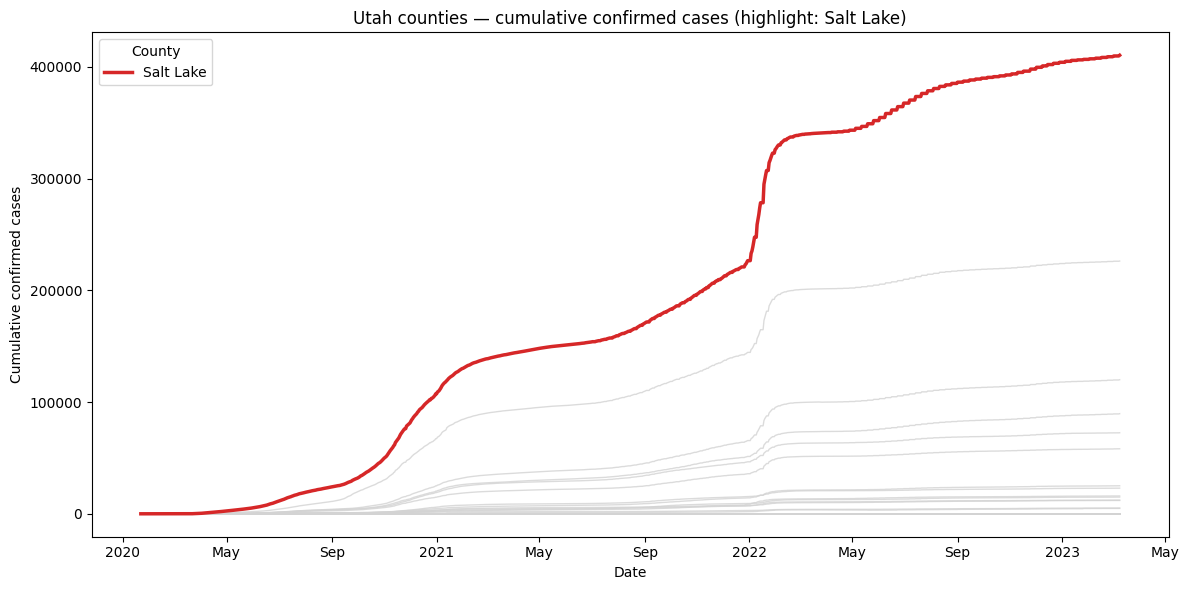

In [2]:
'''
Create a visualization that shows all of the counties in Utah as a time series,
similar to the one shown in slide 22 during the lecture. The graphic should
-Show cases over time
-Have all counties plotted in a background color (something like grey)
-Have a single county plotted in a contrasting color (something not grey)
-Have well formatted dates as the X axis
'''


covid_df_UT = covid_df[covid_df['Province_State'] == 'Utah'].copy()
date_mask = pd.to_datetime(covid_df_UT.columns, errors='coerce').notna()
date_cols = covid_df_UT.columns[date_mask]

# Parse column names vectorized, drop non-dates, and sort chronologically
parsed = pd.to_datetime(date_cols, errors='coerce')
s = pd.Series(parsed, index=date_cols)
s = s.dropna().sort_values()
date_cols = s.index.tolist()

# Aggregate rows by county name if there are duplicates (safer than set_index alone)
df_by_county = covid_df_UT.groupby('Admin2')[date_cols].sum()
# Transpose so rows = dates, columns = counties, then convert index to datetime
ts = df_by_county.T
ts.index = pd.to_datetime(ts.index)

#Plot data
fig, ax = plt.subplots(figsize=(12,6))
for county in ts.columns:
    ax.plot(ts.index, ts[county], color='lightgrey', linewidth=1, alpha=0.8)

# Highlight county with most cases to date
highlight = ts.iloc[-1].idxmax()
ax.plot(ts.index, ts[highlight], color='C3', linewidth=2.5, label=highlight)

ax.set_title(f'Utah counties — cumulative confirmed cases (highlight: {highlight})')
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative confirmed cases')

#mdates to format dates on x axis
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(mdates.AutoDateLocator()))
ax.legend(title='County')
plt.tight_layout()
plt.savefig('question1.png', dpi=300, bbox_inches='tight')
plt.show()


/var/folders/kx/zcggfdps6b39nj5dh0y7mxyh0000gn/T/ipykernel_1906/1533785877.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  date_mask_UT = pd.to_datetime(covid_df_UT.columns, errors='coerce').notna()
/var/folders/kx/zcggfdps6b39nj5dh0y7mxyh0000gn/T/ipykernel_1906/1533785877.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  date_mask_FL = pd.to_datetime(covid_df_FL.columns, errors='coerce').notna()
/var/folders/kx/zcggfdps6b39nj5dh0y7mxyh0000gn/T/ipykernel_1906/1533785877.py:30: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ts_UT.index = pd.to_datetime(ts_UT.index)
/v

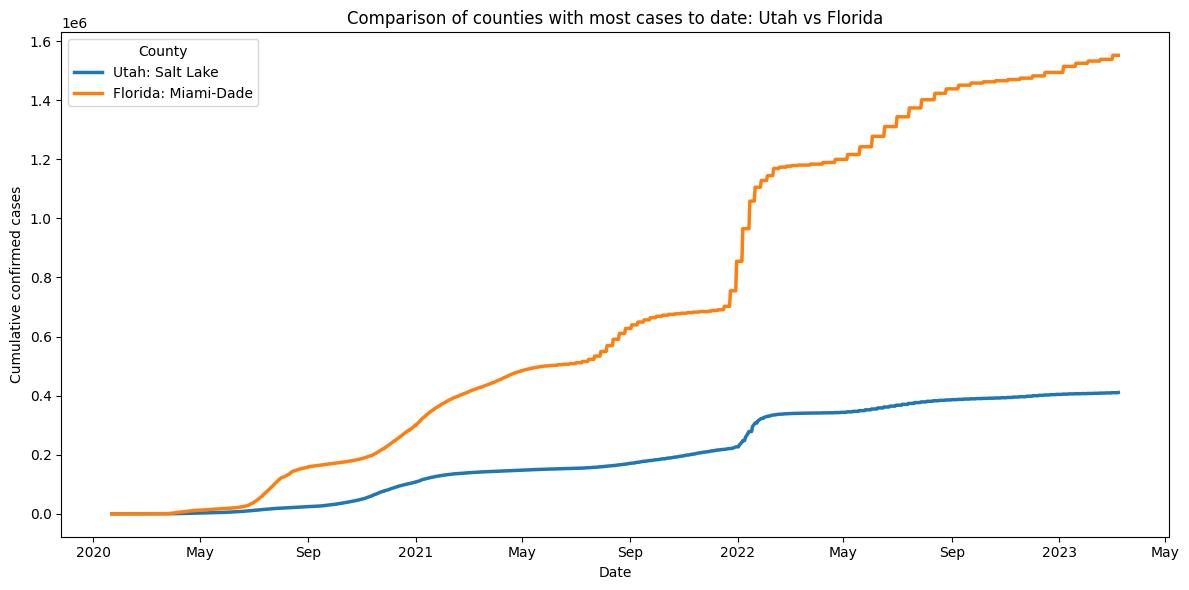

In [4]:
'''
Create a visualization that shows the contrast between the county in Utah with
the most cases to date to a county in Florida with the most cases to date.
The graphic should:
-Have only two counties plotted
-Highlight the difference between the two comparison counties
You may use any style of graphic you like as long as it is effective (dense)
and readable
'''

covid_df_UT = covid_df[covid_df['Province_State'] == 'Utah'].copy()
covid_df_FL = covid_df[covid_df['Province_State'] == 'Florida'].copy()

# Detect date columns (vectorized) - UT
date_mask_UT = pd.to_datetime(covid_df_UT.columns, errors='coerce').notna()
date_cols_UT = covid_df_UT.columns[date_mask_UT]
# Detect date columns (vectorized) - FL
date_mask_FL = pd.to_datetime(covid_df_FL.columns, errors='coerce').notna()
date_cols_FL = covid_df_FL.columns[date_mask_FL]
# Aggregate rows by county name if there are duplicates - UT
df_by_county_UT = covid_df_UT.groupby('Admin2')[date_cols_UT].sum()
# Aggregate rows by county name if there are duplicates - FL
df_by_county_FL = covid_df_FL.groupby('Admin2')[date_cols_FL].sum()

df_by_county_UT = df_by_county_UT.loc[[df_by_county_UT[date_cols_UT[-1]].idxmax()]]
df_by_county_FL = df_by_county_FL.loc[[df_by_county_FL[date_cols_FL[-1]].idxmax()]]

# Transpose so rows = dates, columns = counties, then convert index to datetime - UT
ts_UT = df_by_county_UT.T
ts_UT.index = pd.to_datetime(ts_UT.index)
# Transpose so rows = dates, columns = counties, then convert index to datetime - FL
ts_FL = df_by_county_FL.T
ts_FL.index = pd.to_datetime(ts_FL.index)


fig, ax = plt.subplots(figsize=(12,6))

ax.plot(ts_UT.index, ts_UT[df_by_county_UT.index[0]], color='C0', linewidth=2.5, label=f'Utah: {df_by_county_UT.index[0]}')
ax.plot(ts_FL.index, ts_FL[df_by_county_FL.index[0]], color='C1', linewidth=2.5, label=f'Florida: {df_by_county_FL.index[0]}')
ax.set_title('Comparison of counties with most cases to date: Utah vs Florida')
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative confirmed cases')
#Using mdates for date formatting
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(mdates.AutoDateLocator()))
ax.legend(title='County')
plt.tight_layout()
plt.savefig('question2.png', dpi=300, bbox_inches='tight') 
plt.show() 


/var/folders/kx/zcggfdps6b39nj5dh0y7mxyh0000gn/T/ipykernel_1906/1041771347.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  date_mask_SLC = pd.to_datetime(covid_df_SLC.columns, errors='coerce').notna()
/var/folders/kx/zcggfdps6b39nj5dh0y7mxyh0000gn/T/ipykernel_1906/1041771347.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ts_SLC.index = pd.to_datetime(ts_SLC.index)


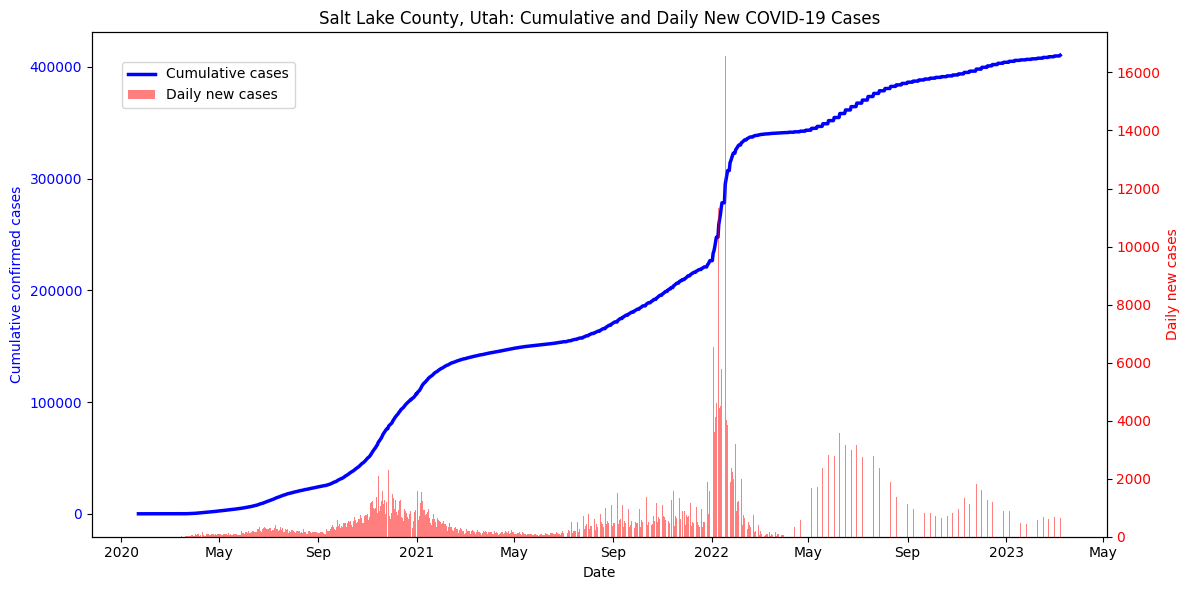

In [5]:
'''
Create a visualization that shows BOTH the running total of cases for a single
county AND the daily new cases. The graphic should:
-Use two y-axes (https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html)
-Use color to contrast the two series being plotted
-Have well formatted dates as the X axis
'''

# Select a Salt Lake County, Utah
covid_df_SLC = covid_df[covid_df['Admin2'] == 'Salt Lake'].copy()
date_mask_SLC = pd.to_datetime(covid_df_SLC.columns, errors='coerce').notna()
date_cols_SLC = covid_df_SLC.columns[date_mask_SLC]

# Aggregate rows by county name if there are duplicates
covid_df_SLC = covid_df_SLC.groupby('Admin2')[date_cols_SLC].sum()

# Transpose so rows = dates, columns = counties, then convert index to datetime
ts_SLC = covid_df_SLC.T
ts_SLC.index = pd.to_datetime(ts_SLC.index)

# Calculate daily new cases and create a new column
daily_new_cases = ts_SLC['Salt Lake'].diff().fillna(0).astype(int)

fig, ax1 = plt.subplots(figsize=(12,6))

# Create the first y-axis for cumulative cases
color1 = 'blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Cumulative confirmed cases', color=color1)
ax1.plot(ts_SLC.index, ts_SLC['Salt Lake'], color=color1, linewidth=2.5, label='Cumulative cases')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.xaxis.set_major_locator(mdates.AutoDateLocator())
ax1.xaxis.set_major_formatter(mdates.ConciseDateFormatter(mdates.AutoDateLocator()))

# Create a second y-axis for daily new cases
ax2 = ax1.twinx()
color2 = 'red'
ax2.set_ylabel('Daily new cases', color=color2)
ax2.bar(ts_SLC.index, daily_new_cases, color=color2, label='Daily new cases', width=1.0, linewidth=0, alpha=0.5)
ax2.tick_params(axis='y', labelcolor=color2)

#Plat title and legend
ax1.set_title('Salt Lake County, Utah: Cumulative and Daily New COVID-19 Cases')
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))

fig.tight_layout()
plt.savefig('question3.png', dpi=300, bbox_inches='tight')
plt.show()

/var/folders/9s/37mwkx9j7693ct5vw9t2xj8h0000gn/T/ipykernel_14996/3608767648.py:23: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ts_UT.index = pd.to_datetime(ts_UT.index)


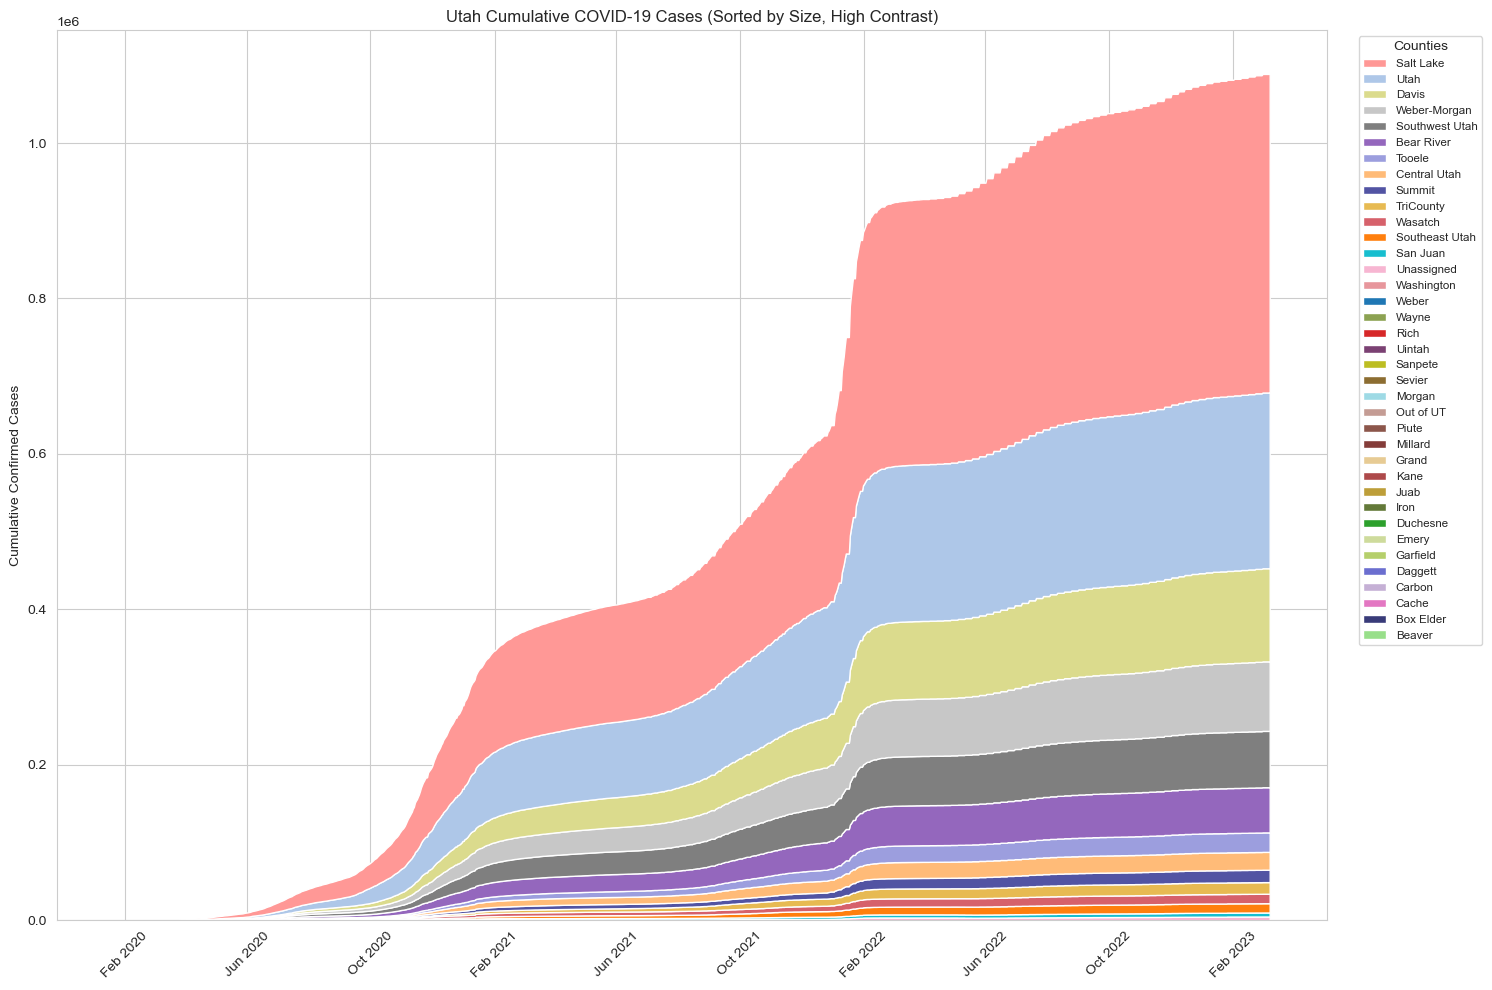

/var/folders/9s/37mwkx9j7693ct5vw9t2xj8h0000gn/T/ipykernel_14996/3608767648.py:73: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  date_mask_NY = pd.to_datetime(covid_df_NY.columns, errors='coerce').notna()
/var/folders/9s/37mwkx9j7693ct5vw9t2xj8h0000gn/T/ipykernel_14996/3608767648.py:81: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ts_NY.index = pd.to_datetime(ts_NY.index)
/var/folders/9s/37mwkx9j7693ct5vw9t2xj8h0000gn/T/ipykernel_14996/3608767648.py:99: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('nipy_spectral

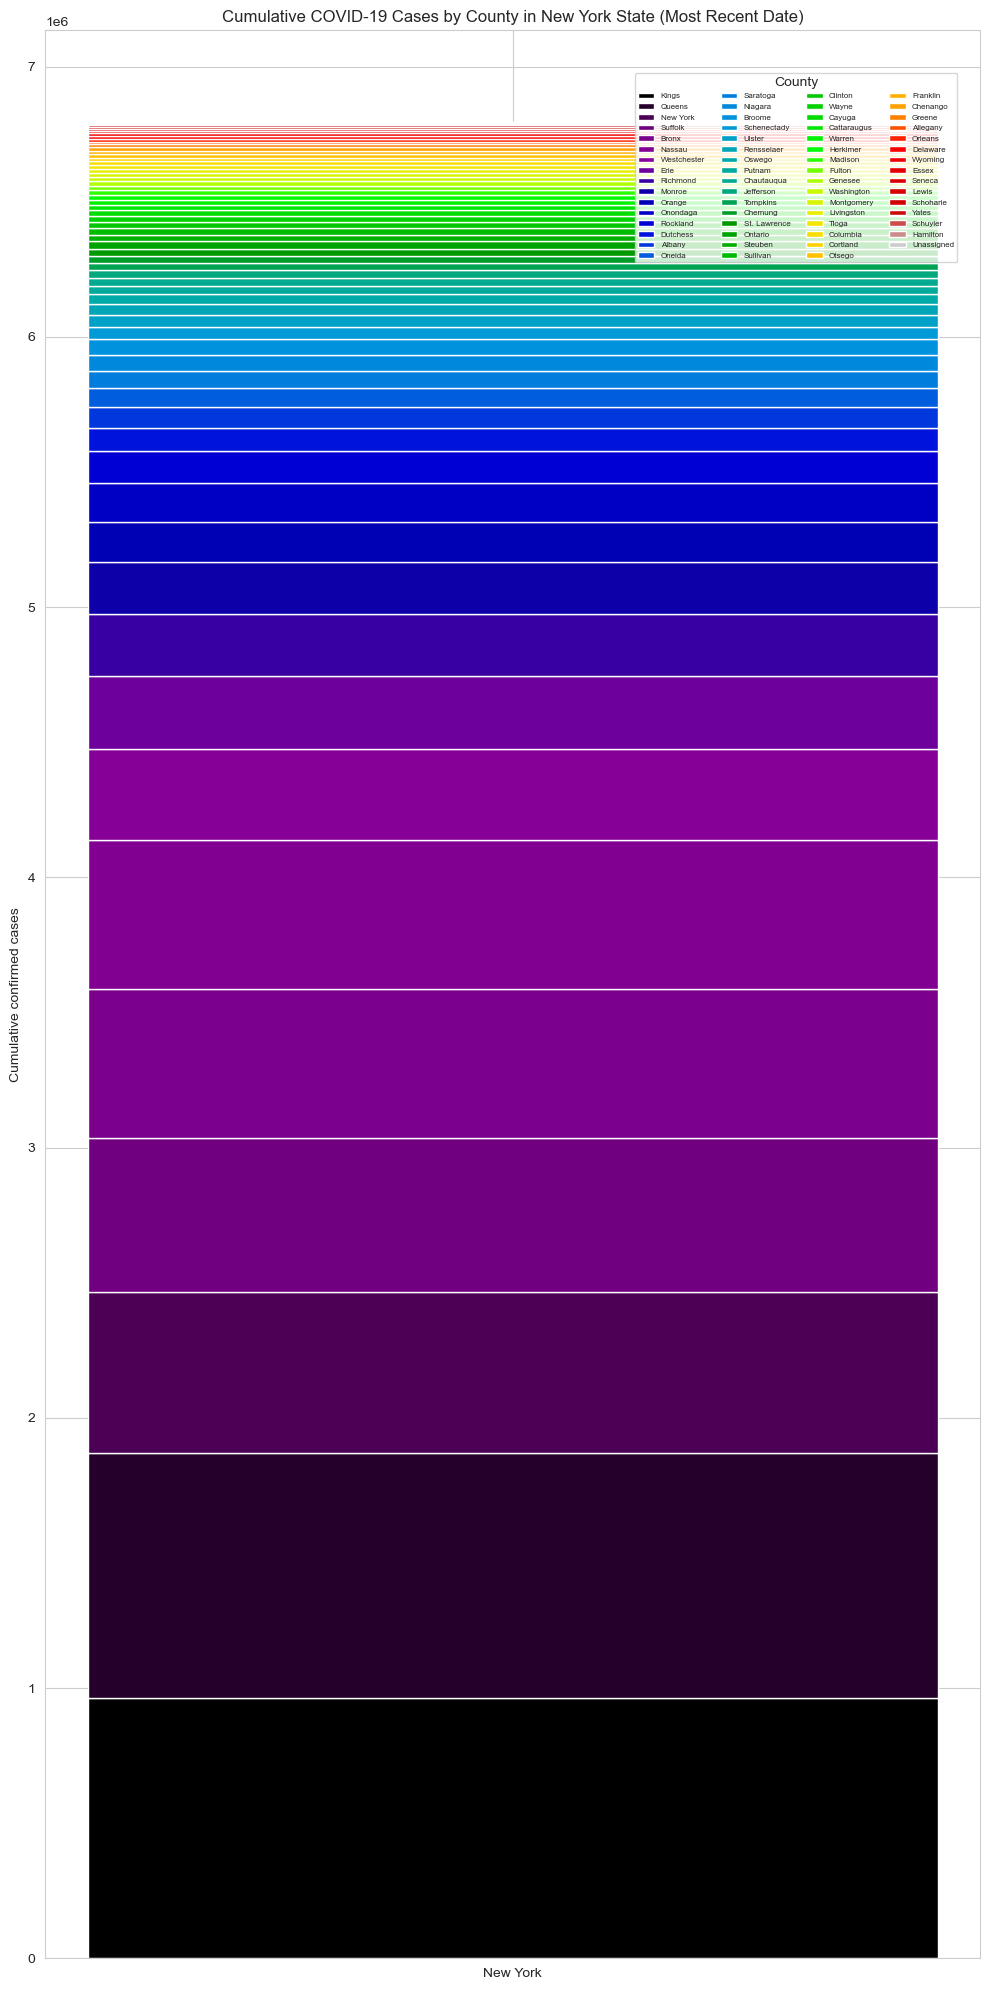

In [ ]:
'''
Create a visualization that shows a stacked bar chart of county contributions
to a given state's total cases. You may choose any state (or states).
(https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_stacked.html#sphx-glr-gallery-lines-bars-and-markers-bar-stacked-py)
The graphic should:
-Have a single column delineate a state
-Have each 'slice' or column compontent represent a county
'''
import numpy as np  
import random

# Load the data
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
covid_df = pd.read_csv(url, index_col=0)

#Filter for Utah
df_UT = covid_df[covid_df['Province_State'] == 'Utah'].copy()
df_UT.set_index('Admin2', inplace=True)

#Filter for date columns and transpose
date_cols = [c for c in df_UT.columns if '/' in c]
ts_UT = df_UT[date_cols].T
ts_UT.index = pd.to_datetime(ts_UT.index)

#Sort Columns by Size (Smallest -> Largest)
final_totals = ts_UT.iloc[-1]
sorted_counties = final_totals.sort_values(ascending=True).index
df_sorted = ts_UT[sorted_counties]

# Combine multiple qualitative colormaps to get a larger pool of distinct colors
colors_pool = (
    list(plt.cm.tab20.colors) + 
    list(plt.cm.tab20b.colors) + 
    list(plt.cm.tab20c.colors)
)

# Select the number of colors we need
num_counties = len(df_sorted.columns)
selected_colors = colors_pool[:num_counties]

# Shuffle the list to ensure no similar colors are next to each other in the sorted stack
random.seed(42) 
random.shuffle(selected_colors)

#Plot data
fig, ax = plt.subplots(figsize=(15, 10))
ax.stackplot(df_sorted.index, df_sorted.T.values, labels=df_sorted.columns, colors=selected_colors)

# Formatting - Using mdates for date formatting
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)

ax.set_ylabel('Cumulative Confirmed Cases')
ax.set_title('Utah Cumulative COVID-19 Cases (Sorted by Size, High Contrast)')

# Legend (Reversed to match stack order)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.02, 1), loc='upper left', fontsize='small', ncol=1, title='Counties')

plt.tight_layout()
plt.savefig('question4a.png')
plt.show()

#======================================================
#I am unclear about the requirements for this one, but here is my other interpretation of the question:
#======================================================

# Select a state (e.g., New York)
covid_df_NY = covid_df[covid_df['Province_State'] == 'New York'].copy()

# Create date mask and date columns - NY
date_mask_NY = pd.to_datetime(covid_df_NY.columns, errors='coerce').notna()
date_cols_NY = covid_df_NY.columns[date_mask_NY]
# Aggregate rows by county name if there are duplicates - NY
df_by_county_NY = covid_df_NY.groupby('Admin2')[date_cols_NY].sum()


# Transpose so rows = dates, columns = counties, then convert index to datetime - NY
ts_NY = df_by_county_NY.T
ts_NY.index = pd.to_datetime(ts_NY.index)
# Select the most recent date for the stacked bar chart
latest_date = ts_NY.index.max()
latest_data = ts_NY.loc[latest_date]
# Remove any non-county rows (e.g. 'Out of NY') if present
latest_data = latest_data.drop(index='Out of NY', errors='ignore')
# Sort counties by number of cases
latest_data = latest_data.sort_values(ascending=False) 
latest_data.rename_axis('County', inplace=True)

# Ensure ordering largest first
latest_data = latest_data.sort_values(ascending=False)

counties = latest_data.index
cases = latest_data.values

# Generate a colormap with enough distinct colors
N = len(latest_data)
cmap = plt.cm.get_cmap('nipy_spectral')   # or 'viridis', 'gist_ncar', 'hsv'
colors = [cmap(i/(N-1)) for i in range(N)]


# Create stacked bar chart
fig, ax = plt.subplots(figsize=(10,20))
counties = latest_data.index
cases = latest_data.values

# Stacked bar chart
bottom=0
for color, county, val in zip(colors, counties, cases):
    ax.bar('New York', val, bottom=bottom, color=color)
    bottom += val


ax.set_title('Cumulative COVID-19 Cases by County in New York State (Most Recent Date)')
ax.set_ylabel('Cumulative confirmed cases')
# Move legend inside the axes and reduce font size to keep it compact
# Use multiple columns to reduce vertical length when there are many counties
ax.legend(counties, title='County', loc='upper right', bbox_to_anchor=(0.98, 0.98), fontsize='xx-small', ncol=4)

# Make the axes occupy the full figure height (100%)
fig.subplots_adjust(top=1.0, bottom=0.0)
plt.tight_layout()
plt.savefig('question4b.png')
plt.show()

/var/folders/kx/zcggfdps6b39nj5dh0y7mxyh0000gn/T/ipykernel_1906/2480354148.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  date_mask = pd.to_datetime(covid_df.columns, errors='coerce').notna()
/var/folders/kx/zcggfdps6b39nj5dh0y7mxyh0000gn/T/ipykernel_1906/2480354148.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize='small')


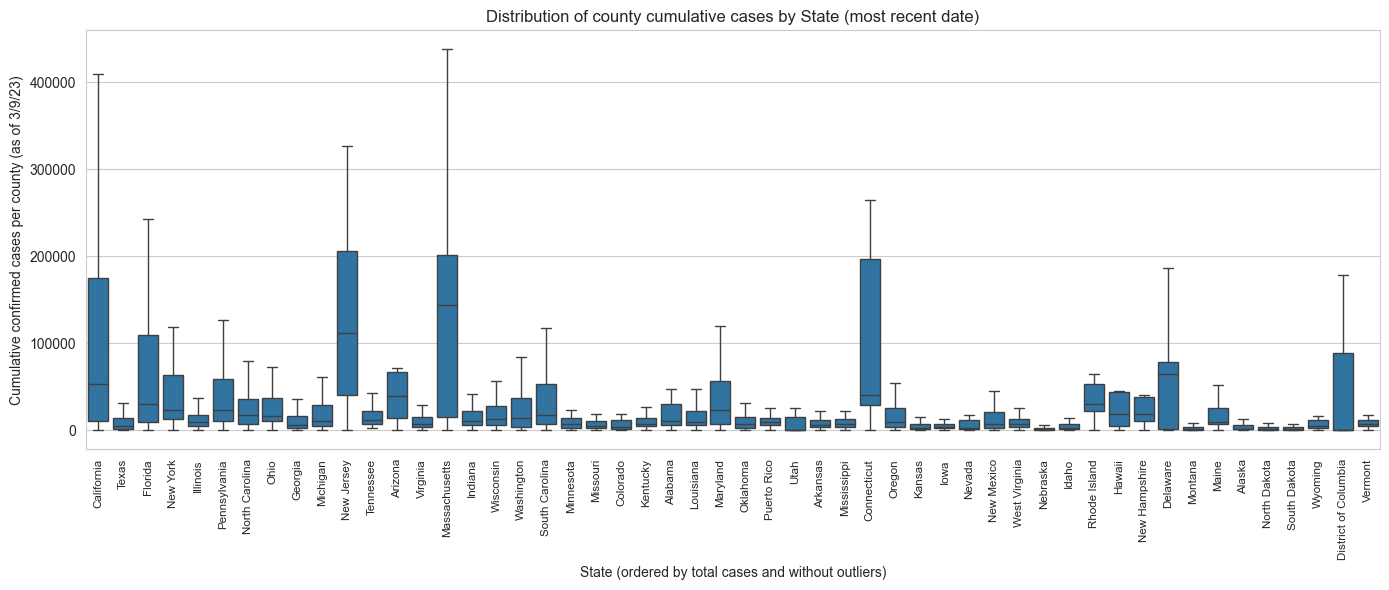

In [24]:
'''
Use Seaborn to create a grouped box plot of all reported states. Each boxplot
should be a distinct state. Have the states ordered from most cases (FL) to fewest 
cases. (https://seaborn.pydata.org/examples/grouped_boxplot.html)
'''
import seaborn as sns
sns.set_style('whitegrid')

#Not sure about this question, but here is my interpretation:
#I created a boxplot of county cumulative cases per state for the most recent date
#I then plotted the boxplots with states ordered by total cases

# Detect date columns (vectorized) and pick the most recent date
date_mask = pd.to_datetime(covid_df.columns, errors='coerce').notna()
date_cols = covid_df.columns[date_mask]
date_cols = sorted(date_cols, key=lambda c: pd.to_datetime(c))
latest_col = date_cols[-1]

# Aggregate at the (State, County) level for the latest date
df_by_county = covid_df.groupby(['Province_State', 'Admin2'])[latest_col].sum().reset_index(name='Cases')

# Compute state ordering by total cases (descending)
state_order = df_by_county.groupby('Province_State')['Cases'].sum().sort_values(ascending=False).index.tolist()

# Plot boxplots: distribution of county cumulative cases per state (most recent date)
fig, ax = plt.subplots(figsize=(14,6))
sns.boxplot(data=df_by_county, x='Province_State', y='Cases', order=state_order, ax=ax, showfliers=False)
ax.set_xlabel('State (ordered by total cases and without outliers)')
ax.set_ylabel(f'Cumulative confirmed cases per county (as of {latest_col})')
ax.set_title('Distribution of county cumulative cases by State (most recent date)')

# Rotate state labels and reduce font size 
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize='small')
plt.tight_layout()
plt.savefig('question5.png', dpi=300, bbox_inches='tight')
plt.show()
